In [68]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [36]:
path='/home/drallab/datamining/Data_Mining_final_project/Opinion_Mining_Yelp/amazon_reviews.txt'
data = pd.read_table(path)
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
DOC_ID               21000 non-null int64
LABEL                21000 non-null object
RATING               21000 non-null int64
VERIFIED_PURCHASE    21000 non-null object
PRODUCT_CATEGORY     21000 non-null object
PRODUCT_ID           21000 non-null object
PRODUCT_TITLE        21000 non-null object
REVIEW_TITLE         21000 non-null object
REVIEW_TEXT          21000 non-null object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [37]:

data = data[(data.RATING == 5) | (data.RATING == 1)]

In [38]:
data.dropna(inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13967 entries, 9 to 20998
Data columns (total 9 columns):
DOC_ID               13967 non-null int64
LABEL                13967 non-null object
RATING               13967 non-null int64
VERIFIED_PURCHASE    13967 non-null object
PRODUCT_CATEGORY     13967 non-null object
PRODUCT_ID           13967 non-null object
PRODUCT_TITLE        13967 non-null object
REVIEW_TITLE         13967 non-null object
REVIEW_TEXT          13967 non-null object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [40]:
data.isnull().values.any()

False

In [41]:
data.head()

DOC_ID       LABEL  RATING VERIFIED_PURCHASE        PRODUCT_CATEGORY  \
9       10  __label1__       1                 N  Health & Personal Care   
10      11  __label1__       1                 N  Health & Personal Care   
32      33  __label1__       1                 N                Wireless   
39      40  __label1__       1                 N  Health & Personal Care   
49      50  __label1__       1                 N                  Beauty   

    PRODUCT_ID                                      PRODUCT_TITLE  \
9   B00H4IBD0M  Sheer TEST, Best Testosterone Booster Suppleme...   
10  B00VQNLQL2  #1 Most Potent Male Performance Enhancement Su...   
32  B00FA9DMDS  iPhone 5S Case, Caseology [Fusion Series] Scra...   
39  B00N26SVO6  MaleMax Sexual Performance Pills Increase Size...   
49  B00EILBYDO  L'Oreal Paris Vive Pro for Men 2-in-1 Daily Th...   

                                REVIEW_TITLE  \
9   WARNING: do not waste your money on this   
10    Unfortunately they didn't work for me.   
32                             Changed color   
39           Waist Of money reviews are fake   
49                stripped more hair from me   

                                          REVIEW_TEXT  
9   Everybody wants to fall for their promises. Bu...  
10  Unfortunately they didn't work for me. They ma...  
32  The sides of the case didn't match my phone at...  
39  No go. All the reviews are fake. Buyer be ware...  
49  I had high hopes for a thickening shampoo inst...

In [42]:
X_data = data['REVIEW_TEXT']
y_data = data['RATING']   

In [43]:
X_data.shape

(13967,)

In [44]:
y_data.shape

(13967,)

In [12]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_data,y_data,test_size =0.3,random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(9776,)
(4191,)
(9776,)
(4191,)


/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#CountVectorizer shall be used to work on text data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<9776x23605 sparse matrix of type '<class 'numpy.int64'>'
	with 451863 stored elements in Compressed Sparse Row format>

In [14]:
vect.vocabulary_

{'was': 22815,
 'little': 12498,
 'sceptical': 18240,
 'about': 940,
 'this': 21158,
 'backpack': 2462,
 'but': 3683,
 'went': 22985,
 'ahead': 1324,
 'and': 1615,
 'bought': 3301,
 'it': 11458,
 'am': 1517,
 'very': 22508,
 'happy': 10027,
 'with': 23216,
 'has': 10087,
 'big': 2944,
 'tripod': 21718,
 'not': 14323,
 'the': 21066,
 'ones': 14629,
 'shown': 18860,
 'here': 10298,
 'ido': 10759,
 'video': 22551,
 'also': 1489,
 'straps': 20146,
 'on': 14625,
 'fit': 8521,
 'case': 4029,
 'all': 1435,
 'thought': 21178,
 'don': 6860,
 'need': 14101,
 'that': 21062,
 'space': 19541,
 'as': 1939,
 'just': 11735,
 'right': 17664,
 'size': 19029,
 'these': 21114,
 'great': 9684,
 'compartments': 4923,
 'nice': 14204,
 'padding': 14996,
 'back': 2446,
 'is': 11424,
 'touch': 21480,
 'monticello': 13711,
 'greenhouses': 9697,
 'are': 1851,
 'way': 22885,
 'over': 14871,
 'priced': 16192,
 'compared': 4917,
 'to': 21351,
 'what': 23011,
 'other': 14795,
 'companies': 4909,
 'offer': 14553,
 'am

In [16]:
vect.get_feature_names()

['00',
 '000',
 '0000',
 '00101',
 '005',
 '005in',
 '005mm',
 '007m',
 '007p',
 '009',
 '01',
 '02',
 '02i02am',
 '02r5rsx85p8e3fya47jd',
 '0401',
 '05',
 '051',
 '06',
 '07',
 '08',
 '09',
 '0l',
 '0p',
 '0tspa9fmspbz02bgy1b1',
 '0w40',
 '10',
 '100',
 '1000',
 '1000fps',
 '1000mg',
 '1000w',
 '100ft',
 '100k',
 '100lbs',
 '100psi',
 '100v',
 '100w',
 '101',
 '102',
 '103',
 '1036',
 '104',
 '105',
 '105k',
 '105mm',
 '108',
 '1080',
 '1080i',
 '1080p',
 '1080w',
 '1090',
 '10a',
 '10degrees',
 '10fl',
 '10fps',
 '10hrs',
 '10k',
 '10ks',
 '10lb',
 '10lbs',
 '10m',
 '10mins',
 '10ml',
 '10mm',
 '10mp',
 '10pk',
 '10s',
 '10th',
 '10x',
 '10x15',
 '10x20',
 '10yr',
 '11',
 '110',
 '1100',
 '110v',
 '110vac',
 '111',
 '113',
 '115',
 '1152',
 '1155',
 '115b',
 '1160us',
 '118',
 '1186',
 '118th',
 '119',
 '11ac',
 '11hr',
 '11n',
 '11pm',
 '12',
 '120',
 '1200',
 '12000mah',
 '1200mah',
 '120gb',
 '120hz',
 '120lbs',
 '1225',
 '123',
 '124',
 '125',
 '1250',
 '127',
 '128gb',
 '1299',


In [45]:
X_test_dtm = vect.transform(X_test)

In [46]:
#Encode 1 and 5 rating
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [47]:
#using GridsearchCV for parameter selection and tuning

from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
grid_params = {'alpha':np.arange(0.0,1.0,0.1)}
grid = GridSearchCV(MultinomialNB(),param_grid=grid_params,cv=10)
grid.fit(X_train_dtm,y_train)

/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alp

GridSearchCV(cv=10, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
grid.best_params_

{'alpha': 0.5}

In [49]:
#Best score
grid.best_score_

0.9167348608837971

In [22]:
#Lets use alpha = 1.0 with MultinomialNB
nb = MultinomialNB(alpha=0.10)
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [50]:
#Lets predict with test data
nb_pred = nb.predict(X_test_dtm)

In [51]:
#lets analyse 25 elements of predicted and test y labels , 0 means 1 rating and 1 means 5 rating 
print('Predicted',(nb_pred[:25]))
print('True     ',(y_test[:25]))

Predicted [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0]
True      [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1]


In [53]:
#Lets calculate the accuracy 
from sklearn import metrics
print ('accuracy score',metrics.accuracy_score(y_test,nb_pred))


accuracy score 0.9288952517298974


In [54]:
#Lets see the confusion metrix 
conf_matrix=metrics.confusion_matrix(y_test,nb_pred)
print('confusion matrix \n',conf_matrix)

confusion matrix 
 [[ 328  193]
 [ 105 3565]]


In [55]:
pd.crosstab(y_test, nb_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted    0     1   All
True                      
0          328   193   521
1          105  3565  3670
All        433  3758  4191

ROC_AUC_SCORE:-  0.8004740935216805


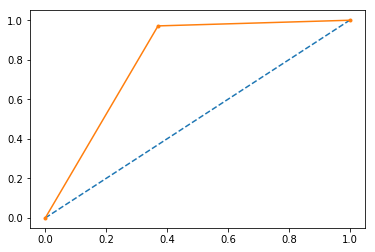

In [60]:
auc_val = metrics.roc_auc_score(y_test,nb_pred)
print('ROC_AUC_SCORE:- ', auc_val)
import matplotlib.pyplot as plt



from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test,nb_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [61]:
#Sensitivity : is the classifier to detecting positive instances , also True Positive Rate" or "Recall"
recall_NB= metrics.recall_score(y_test,nb_pred)
print ('Recall score',recall_NB)


Recall score 0.9713896457765667


In [62]:
#Precision: When a positive value is predicted, how often is the prediction correct?
#How "precise" is the classifier when predicting positive instances?

Precision_NB= metrics.precision_score(y_test,nb_pred)
print('Precision Score', Precision_NB)

Precision Score 0.9486428951569984


In [63]:
#print rating 1 reviews which are falsely callisified as positive i.e rating 5 ,diplay False Postive review comments
X_test[(nb_pred == 1) & (y_test == 0)]

12419    The shirts they send out are different from th...
3654     my son was disappointed because the watch indi...
2238     This cover comes in great colors (I picked the...
1174     So, first of all, the ad shows varying colors....
19851    These are very small and exude a very chemical...
1184     So, after getting what says to be Food Grade d...
20803    Wow! Sleeves are super, super short! Shirt was...
4065     I can't imagine anyone wearing these leggings ...
2948     i think a two year old got behind the camera o...
19840    I found this on my list of things I hadn't rev...
674      I was so happy to find this wonderful toolkit,...
11730    Why does the manufacturer take a perfectly nic...
2551     My roommate and I thought that this would be a...
20284    Reasons I am grossly unhappy with this product...
3718     I had ordered a King size Fiber bed but the on...
11972    In my opinion Formbys has always been worthles...
3354     Flimsy plastic broke first time I used it. I w.

In [64]:
#Lets inspect 1406 review 
X_test[19634]

'the black is very faded and noticeable. Its very soft and comfy but i wish the black was a little stronger and didnt look as cheap.'

In [65]:
#print rating 5 reviews which are falsely callisified as negative i.e rating 1,diplay True Negative review comments
X_test[(nb_pred == 0) & (y_test == 1)]

17208    I own a plumbing, heating, and Cooling company...
19132    I bought this and expected it would take a mon...
9511     I'm satisfied with the good I received. Still ...
8061     I realize this is not a plant for everyone, bu...
16037    The cabe that attaches from the headset to the...
15610    The common problem I find with these things is...
11080    Worked right out of box. Pump seemed to be new...
17291    I thought the Kodak 5500 was great. I tried th...
13712    Was the best deal on a crate I could find had ...
7360     This ink cartridge was everything I hoped for ...
13194    This a great potting table.  It is not all tha...
20306    We wanted a TV that had a nice picture for a n...
14371    Let's see...plugged it into my N64 and my 47" ...
6008     I was not expecting this head band to be so af...
9252     You can just spend hours playing this game and...
7325     Visually inspected the struts. All four struts...
7947     I see the bad reviews, but I do not understand.

In [66]:
X_test[6391]

"Took a little longer to arrive, but there's nothing wrong<br />with the headphone,absolutely exceed what I expected.It worth<br />waiting for,tnx!"

In [67]:
#Lets print classifcation report
class_report = metrics.classification_report(y_test,nb_pred)
print (class_report)

             precision    recall  f1-score   support

          0       0.76      0.63      0.69       521
          1       0.95      0.97      0.96      3670

avg / total       0.92      0.93      0.93      4191

